# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplican un modelo de **Árbol del decisión** al dataset de agua potable (clasificación). El objetivo será predecir la potabilidad del agua basándonos en las demás variables como características. 

## Gestión de datos

#### Carga y creación del dataframe

In [1]:
import pandas as pd
import inflection
from sklearn import datasets


csv = './data/water_potability.csv'
data = pd.read_csv(csv)
df_water = pd.DataFrame(data)
df_water.columns = [inflection.underscore(col.replace(' ', '_').replace('(', '').replace(')', '')) for col in df_water.columns]
df_water.rename(columns={'potability': 'target'}, inplace=True)
df_water.head()


,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,target
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df_water.target.unique()

array([0, 1], dtype=int64)

### Gestión de nulos

In [3]:
print(f'Filas: {df_water.shape[0]}')
print(f'{df_water.isna().sum()}')


Filas: 3276
ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
target               0
dtype: int64


In [4]:
# Calculamos la mediana para completar esos campos
median_per_column = df_water.median()

# Imputar los valores NaN con las medianas correspondientes
df_water = df_water.fillna(median_per_column)

# Verificar el DataFrame después de la imputación
nan_per_column = df_water.isna().sum()
nan_per_column

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
target             0
dtype: int64

#### Visualización de la correlación de las clases

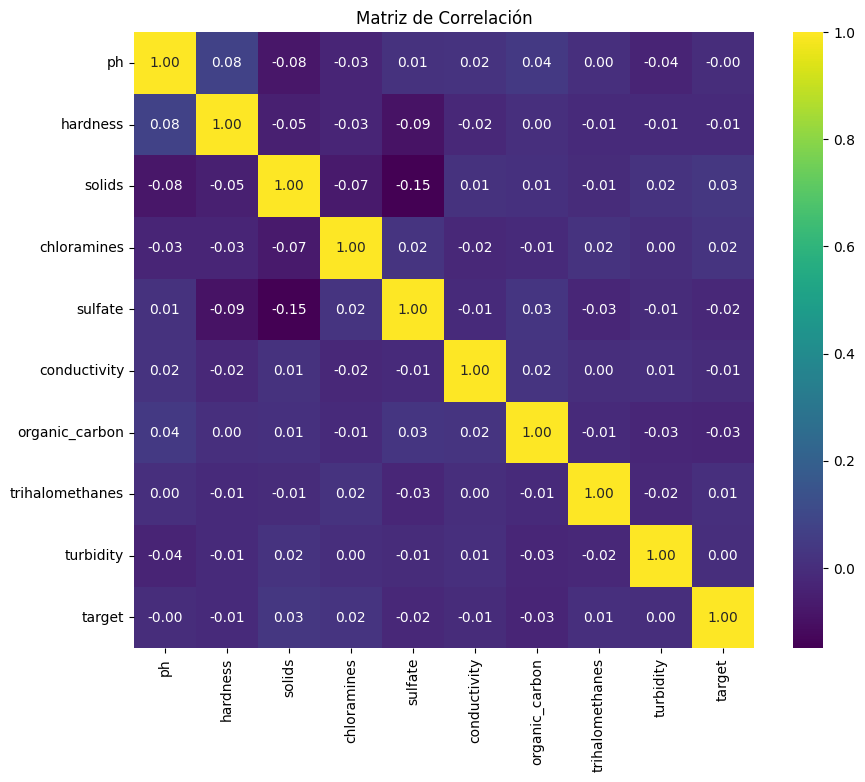

                   ph  hardness  solids  chloramines  sulfate  conductivity  \
ph               1.00      0.08   -0.08        -0.03     0.01          0.02   
hardness         0.08      1.00   -0.05        -0.03    -0.09         -0.02   
solids          -0.08     -0.05    1.00        -0.07    -0.15          0.01   
chloramines     -0.03     -0.03   -0.07         1.00     0.02         -0.02   
sulfate          0.01     -0.09   -0.15         0.02     1.00         -0.01   
conductivity     0.02     -0.02    0.01        -0.02    -0.01          1.00   
organic_carbon   0.04      0.00    0.01        -0.01     0.03          0.02   
trihalomethanes  0.00     -0.01   -0.01         0.02    -0.03          0.00   
turbidity       -0.04     -0.01    0.02         0.00    -0.01          0.01   
target          -0.00     -0.01    0.03         0.02    -0.02         -0.01   

                 organic_carbon  trihalomethanes  turbidity  target  
ph                         0.04             0.00      -0.04 

In [5]:
# Crear una matriz de correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_water.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación con redondeo a 2 decimales
# print("Matriz de Correlación:")
print(correlation_matrix.round(2))

### Lectura de correlación

Correlaciones positivas (cercanas a 1)
- Ninguna

Correlaciones negativas (cercanas a -1)

Correlación Cercana a 0 (correlación débil o nula)

Nada reseñable.

### Preparación de datos para el entrenamiento

In [6]:
from sklearn.model_selection import train_test_split

X = df_water.drop('target', axis=1)
y = df_water['target']

# Divide el DataFrame en conjuntos de entrenamiento y prueba 
train, test = train_test_split(df_water, test_size=0.33, random_state=42)

# Reseteo de índices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Separación características y etiquetas
X_train = train.drop('target', axis=1)  
y_train = train['target']  
X_test = test.drop('target', axis=1)  
y_test = test['target']

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head())  


Conjunto de entrenamiento:
         ph    hardness        solids  chloramines     sulfate  conductivity  \
0  7.036752  158.207647  45243.028953     4.064878  247.180038    399.766965   
1  8.143483  182.432457  10673.582674     6.607835  333.073546    427.545219   
2  5.376078  185.540478  36026.401556     9.649943  343.486633    347.565066   
3  7.535700  221.792481  14829.745971     6.701159  366.412200    583.436488   
4  6.618187  164.254565  13776.621792     5.925462  333.073546    315.199393   

   organic_carbon  trihalomethanes  turbidity  
0       16.086232        53.502086   4.108857  
1       13.719331        77.769334   2.572830  
2       14.004449        66.622485   3.629250  
3       17.731882        59.686076   4.208354  
4       12.082169        61.474423   3.797068  

Conjunto de prueba:
         ph    hardness        solids  chloramines     sulfate  conductivity  \
0  7.036752  183.521107  20461.252710     7.333212  333.119476    356.369022   
1  6.643159  188.913541

### Validación cruzada

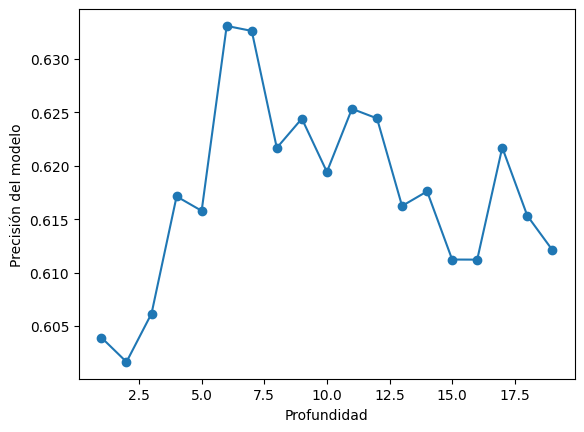

Mejor precisión: 0.6331 . Mejor profundidad: 6


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

cv = KFold(n_splits=10, shuffle=False)

accuracies_list = list()
max_attributes = len(list(train))
depth_range = range(1, max_attributes * 2)

# Inicializar las variables best_accuracy y best_depth antes del bucle
best_accuracy = 0
best_depth = 0

for depth in depth_range:
    fold_accuracy = []
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)

    for train_fold, test_fold in cv.split(train):
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]

        model = model.fit(
            X=f_train.drop(['target'], axis=1),
            y=f_train['target']
        )
        test_acc = model.score(
            X=f_test.drop(['target'], axis=1),
            y=f_test['target'])
        fold_accuracy.append(test_acc)

    avg = sum(fold_accuracy) / len(fold_accuracy)
    accuracies_list.append(avg)
    
    # Actualizar la mejor precisión y profundidad
    if avg > best_accuracy:
        best_accuracy = avg
        best_depth = depth
    
plt.plot(depth_range, accuracies_list, marker='o')
plt.xlabel('Profundidad')
plt.ylabel('Precisión del modelo')
plt.show()

print(f"Mejor precisión: {best_accuracy:.4f} . Mejor profundidad: {best_depth}")



## Construcción del modelo con el mejor parámetro de profundidad

In [8]:
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(criterion='entropy', max_depth = best_depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.90      0.76       680
           1       0.53      0.20      0.29       402

    accuracy                           0.64      1082
   macro avg       0.59      0.55      0.52      1082
weighted avg       0.61      0.64      0.58      1082



## Importancia de las variables

Informe de Importancia de las Variables:
   Características  Importancia
4          sulfate     0.238158
0               ph     0.232852
1         hardness     0.152335
2           solids     0.142577
3      chloramines     0.129985
7  trihalomethanes     0.076969
8        turbidity     0.016404
5     conductivity     0.010720
6   organic_carbon     0.000000


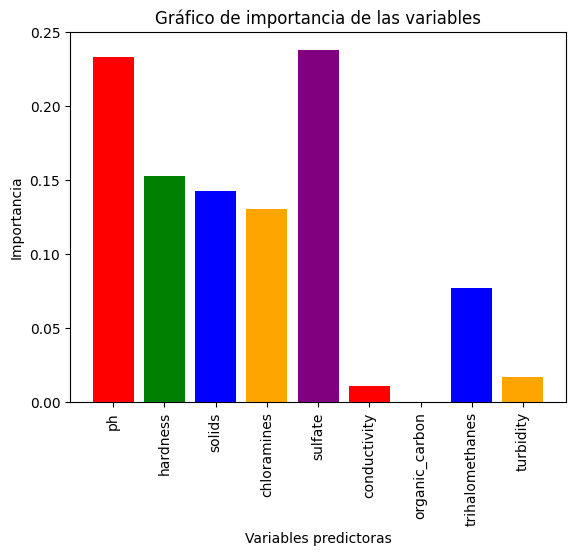

In [9]:
features_names = df_water.columns[:-1].tolist() # Todos la última

# Cargamos la importancia de las características
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Características':features_names, 'Importancia': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostramos
print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(features_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()

## Visualización del árbol

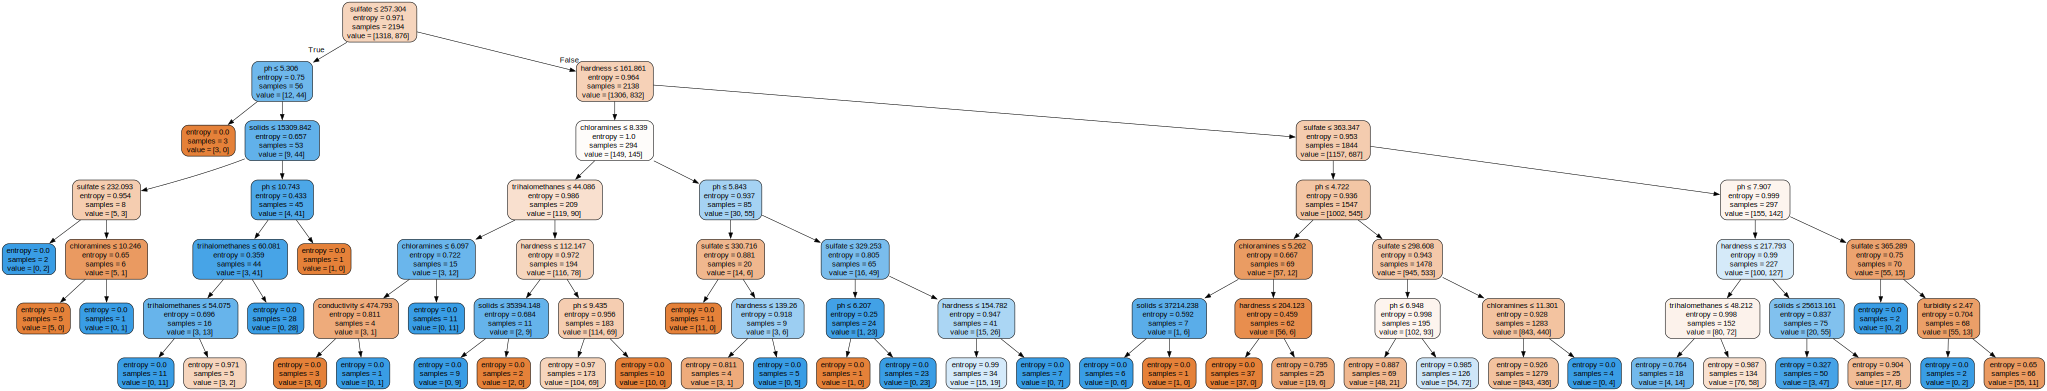

In [10]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


# Crear un archivo DOT que representa el árbol de decisión (en este caso se devuelve como cadena)
# out_file=None: archivo de salida para guardar la representación del árbol. En este caso, se almaacena en la variable dot_data en lugar de en un archivo.

dot_data = export_graphviz(model, out_file=None,
                        feature_names = features_names,
                        filled=True, rounded=True, special_characters=True)

# Generar el gráfico del árbol de decisión desde el archivo DOT
graph = graphviz.Source(dot_data)

# Mostrar
#graph.view("arbol_de_decision")  # Esto guardará el gráfico en un archivo llamado "arbol_de_decision.pdf"
display(graph)